# Assignment 4

In [9]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import powerlaw

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [ ]:
def read_pickle(path):
    with open(path, "rb") as pickle_file:
        return pickle.load(pickle_file)


G1 = read_pickle("assets/A4_P1_G1")


G2 = read_pickle("assets/A4_P1_G2")


G3 = read_pickle("assets/A4_P1_G3")
G4 = read_pickle("assets/A4_P1_G4")


G5 = read_pickle("assets/A4_P1_G5")



P1_Graphs = [G1, G2, G3, G4, G5]

<br>
'P1_Graphs' is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:

- Preferential Attachment (`'PA'`)
- Small World with low probability of rewiring (`'SW_L'`)
- Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [ ]:
def graph_identification():
    for G in P1_Graphs:
        degrees = dict(G.degree())
        degree_values = sorted(set(degrees.values()))
        histogram = [
            list(degrees.values()).count(i) / float(nx.number_of_nodes(G))
            for i in degree_values
        ]
        plt.plot(degree_values, histogram, "o")
        plt.xlabel("Degree")
        plt.ylabel("Fraction of Nodes")
        plt.xscale("log")
        plt.yscale("log")
        plt.show()
        plt.bar(degree_values, histogram)
        plt.xlabel("Degree")
        plt.ylabel("Fraction of Nodes")
        plt.show()

        clustering = nx.average_clustering(G)
        shortest_path = nx.average_shortest_path_length(G)

        print(f"Clustering={clustering}", f"Shortest path={shortest_path}")

    return ["PA", "SW_L", "SW_L", "PA", "SW_H"]

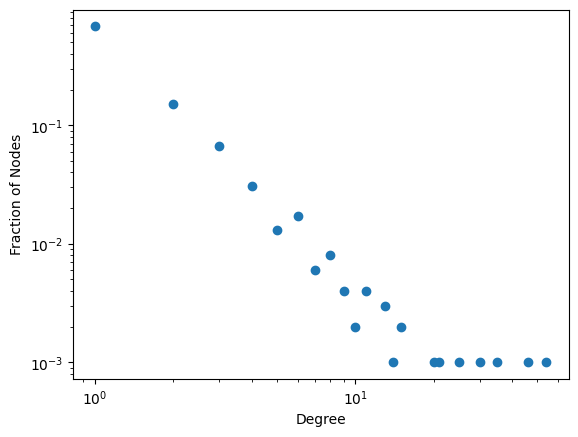

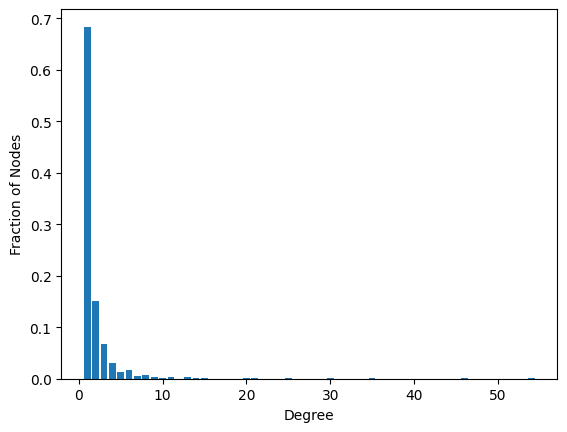

Clustering=0.0 Shortest path=6.530506506506507


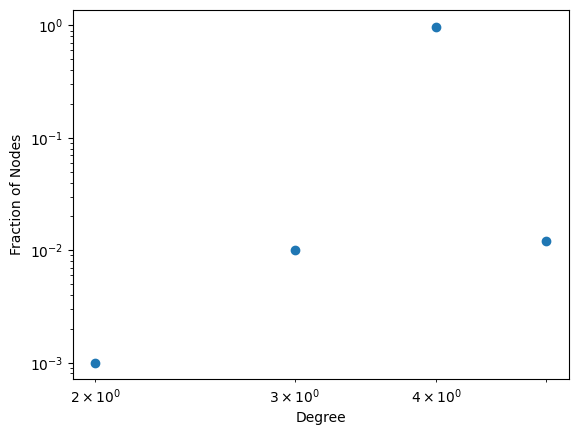

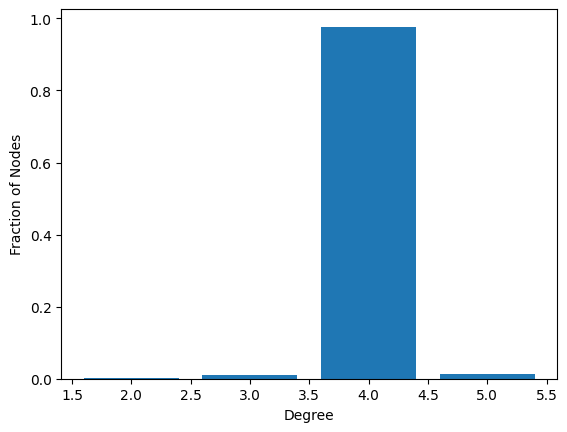

Clustering=0.49310000000000004 Shortest path=43.80284684684685


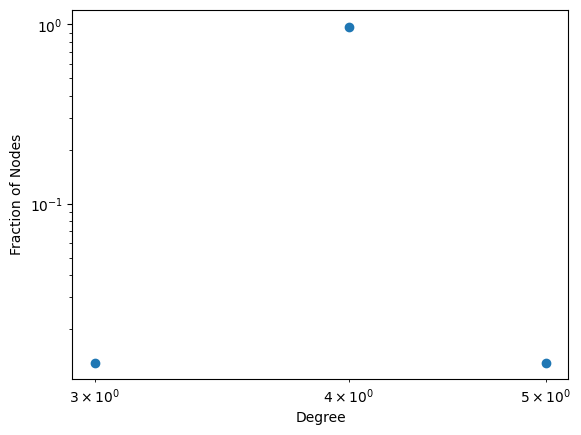

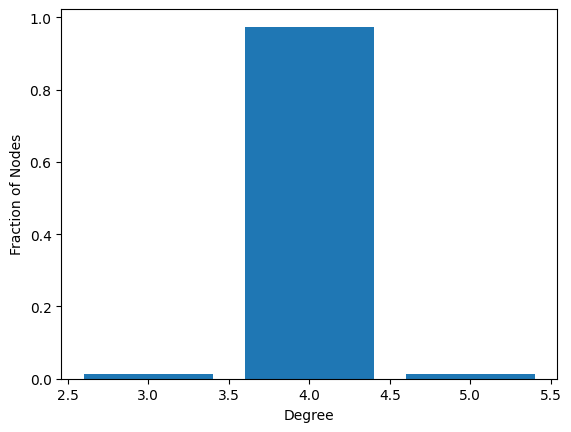

Clustering=0.4897333333333334 Shortest path=39.007695695695695


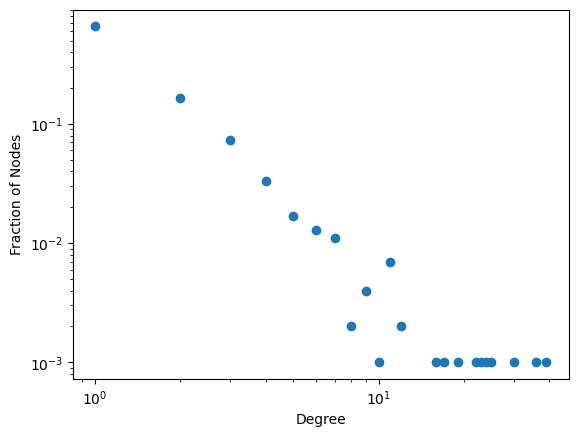

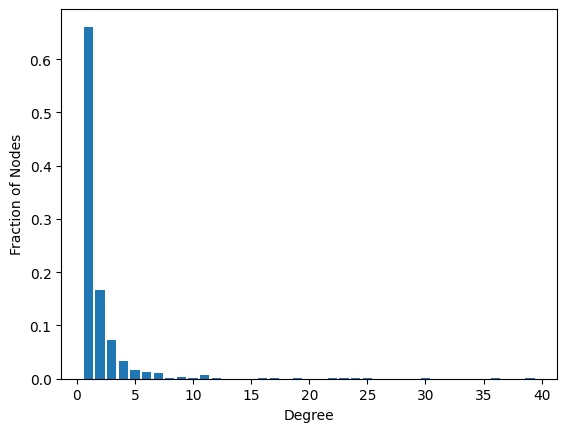

Clustering=0.0 Shortest path=8.158990990990992


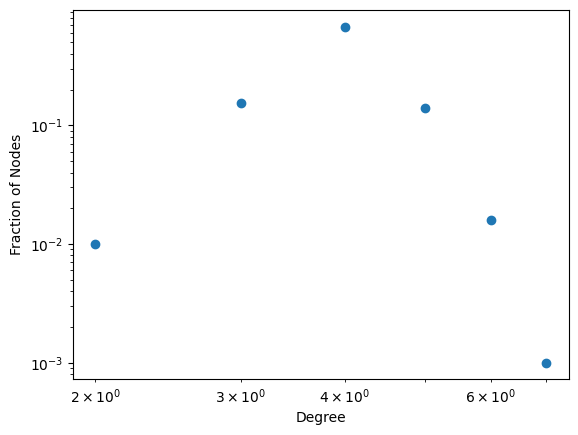

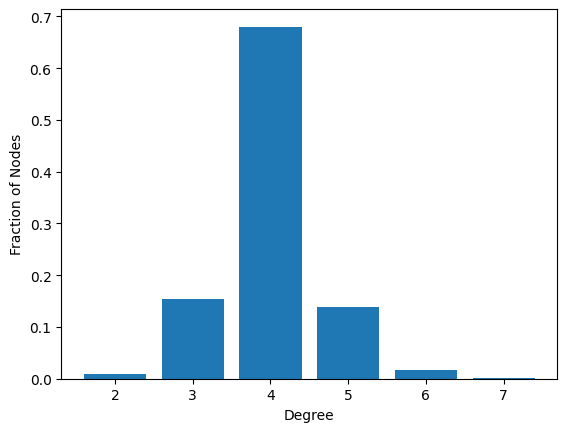

Clustering=0.36504285714285717 Shortest path=8.532046046046046


In [26]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"

---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [27]:
G = pickle.load(open("assets/email_prediction_NEW.txt", "rb"))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [28]:
list(G.nodes(data=True))[:5]  # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [ ]:
node_df = pd.DataFrame(data=G.nodes(data=True), columns=["Node", "Data"])
node_df[["Department", "ManagementSalary"]] = node_df["Data"].apply(pd.Series)
node_df["Department"] = node_df["Department"].astype("Int64")


node_df["clustering"] = nx.clustering(G)
node_df["degree"] = pd.Series(G.degree())
node_df[["drop_col", "degree"]] = node_df["degree"].apply(pd.Series)
node_df["degree_centrality"] = pd.Series(nx.degree_centrality(G))
node_df["closeness"] = pd.Series(nx.closeness_centrality(G))
node_df["betweeness"] = pd.Series(nx.betweenness_centrality(G))
node_df["pr"] = pd.Series(nx.pagerank(G))
node_df = node_df.drop(columns=["Data", "drop_col"])
node_df.index = node_df["Node"].values
train_df = node_df[~node_df.isna().any(axis=1)]

test_df = node_df[node_df.isna().any(axis=1)].drop(columns=["ManagementSalary"])
test_df

,Node,Department,clustering,degree,degree_centrality,closeness,betweeness,pr
1,1,1,0.265306,52,0.051793,0.422360,0.001195,0.001426
65,65,4,0.318691,91,0.095618,0.462152,0.005547,0.002526
18,18,1,0.302597,56,0.057769,0.433151,0.004715,0.001715
215,215,1,0.215784,92,0.079681,0.442068,0.003726,0.002166
283,283,36,0.301188,142,0.055777,0.442068,0.003076,0.001531
...,...,...,...,...,...,...,...,...
691,691,21,1.000000,2,0.001992,0.320093,0.000000,0.000201
788,788,24,0.000000,3,0.002988,0.332998,0.000000,0.000298
944,944,23,1.000000,1,0.002988,0.308052,0.000000,0.000230
798,798,1,0.600000,2,0.005976,0.355934,0.000004,0.000294


In [ ]:
def salary_predictions():
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier

    scaler = StandardScaler()

    X_train = train_df[
        [
            "Node",
            "Department",
            "clustering",
            "degree",
            "degree_centrality",
            "closeness",
            "betweeness",
            "pr",
        ]
    ]
    y_train = train_df["ManagementSalary"]

    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(test_df)

    rf_clf = RandomForestClassifier(n_estimators=500, min_samples_leaf=50)
    rf_clf.fit(X_train_scaled, y_train)

    y_pred_proba = rf_clf.predict_proba(X_test_scaled)[:, 1]

    return pd.Series(y_pred_proba, test_df.index)


salary_predictions()

1      0.251459
65     0.434369
18     0.278662
215    0.400175
283    0.452199
         ...   
691    0.035052
788    0.051805
944    0.040226
798    0.021282
808    0.030905
Length: 252, dtype: float64

In [241]:
ans_salary_preds = salary_predictions()
assert (
    type(ans_salary_preds) == pd.core.series.Series
), "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [ ]:
future_connections = pd.read_csv(
    "assets/Future_Connections.csv", index_col=0, converters={0: eval}
)



future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [262]:
future_connections["Common Neighbors"] = [
    len(list(nx.common_neighbors(G, edge[0], edge[1])))
    for edge in future_connections.index
]
future_connections["Jaccard Coefficient"] = [
    item[2] for item in list(nx.jaccard_coefficient(G, ebunch=future_connections.index))
]
future_connections["Resource Allocation Index"] = [
    item[2]
    for item in list(nx.resource_allocation_index(G, ebunch=future_connections.index))
]
future_connections["Adamic Adar Index"] = [
    item[2] for item in list(nx.adamic_adar_index(G, ebunch=future_connections.index))
]
future_connections["Preferential Attachment"] = [
    item[2]
    for item in list(nx.preferential_attachment(G, ebunch=future_connections.index))
]

train = future_connections[~future_connections["Future Connection"].isnull()]
test = future_connections[future_connections["Future Connection"].isnull()]
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]
y_train = train.iloc[:, 0]

In [263]:
def new_connections_predictions():
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.ensemble import RandomForestClassifier

    # YOUR CODE HERE
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf_clf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
    rf_clf.fit(X_train_scaled, y_train)

    pred_proba = rf_clf.predict_proba(X_test_scaled)[:, 1]

    return pd.Series(pred_proba, X_test.index)

In [264]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"